## ENSEMBLES

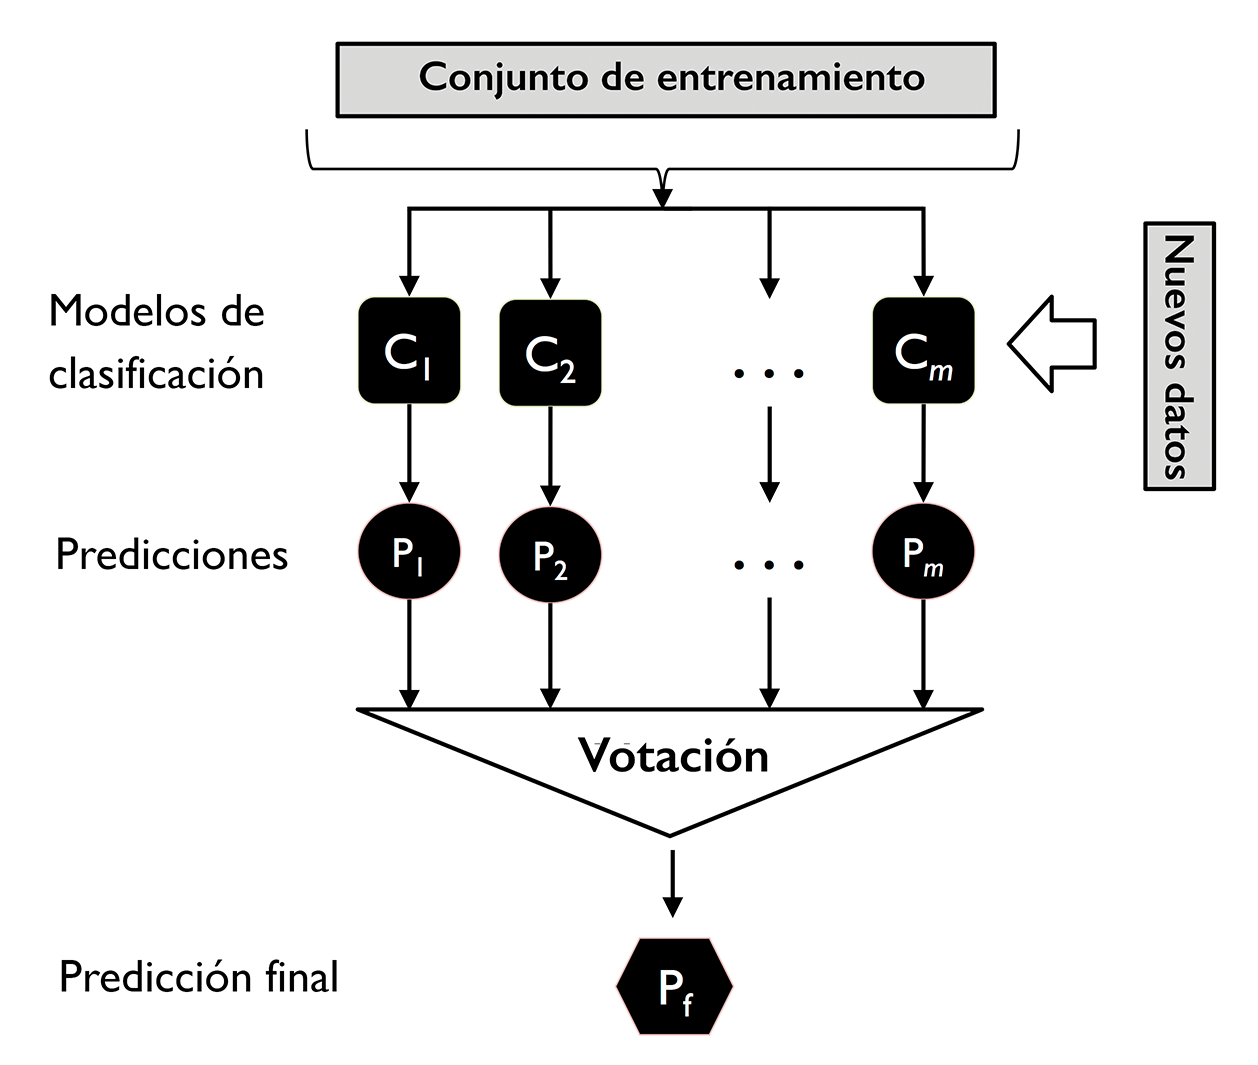

In [6]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']


In [ ]:
# Elimina las filas donde 'Class label' es igual a 1
df_wine = df_wine[df_wine['Class label'] != 1]

# Extrae la variable objetivo (y) y las características (X)
y = df_wine['Class label'].values
X = df_wine[['Alcohol', 'OD280/OD315 of diluted wines']].values

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Inicializa el codificador de etiquetas
le = LabelEncoder()

# Convierte las etiquetas categóricas en valores numéricos
y = le.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X,                # Características (features)
    y,                # Etiquetas (labels)
    test_size=0.2,    # 20% de los datos para prueba, 80% para entrenamiento
    random_state=1,   # Semilla para reproducibilidad
    stratify=y        # Mantiene la proporción de clases en ambos conjuntos
)

El bagging (Bootstrap Aggregating) es una técnica de ensamblado utilizada en aprendizaje automático para mejorar la precisión y estabilidad de los modelos. Lo que hace el bagging es:

Generar múltiples subconjuntos de datos a partir del conjunto de entrenamiento original, seleccionando aleatoriamente muestras con reemplazo (bootstrap).
Entrenar un modelo independiente (por ejemplo, un árbol de decisión) en cada subconjunto.
Combinar las predicciones de todos los modelos entrenados, generalmente mediante votación (para clasificación) o promedio (para regresión).
¿Para qué sirve?

Reduce la varianza del modelo.
Ayuda a evitar el sobreajuste.
Mejora la precisión de las predicciones.
Ejemplo famoso: El algoritmo Random Forest utiliza bagging con árboles de decisión.

En resumen: El bagging crea varios modelos a partir de diferentes muestras del mismo conjunto de datos y combina sus resultados para obtener un modelo más robusto y preciso.

In [ ]:
# Ensemble con Bagging y Árboles de Decisión en scikit-learn

# En este ejemplo se crea un **modelo de Bagging** usando como base un **árbol de decisión**.

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 1️⃣ Definición del árbol de decisión base
tree = DecisionTreeClassifier(
    criterion='entropy',  # Criterio para medir la calidad de la división (información ganada)
    max_depth=None,       # Sin límite de profundidad
    random_state=1        # Semilla para reproducibilidad
)

# 2️⃣ Definición del ensemble Bagging
bag = BaggingClassifier(
    estimator=tree,        # Árbol de decisión como estimador base
    n_estimators=500,      # Número de árboles en el ensemble
    max_samples=1.0,       # Cada árbol se entrena con el 100% de las muestras (con reemplazo)
    max_features=1.0,      # Cada árbol utiliza todas las características
    bootstrap=True,        # Muestreo con reemplazo
    bootstrap_features=False, # No se hace muestreo de características
    n_jobs=1,              # Número de trabajos en paralelo (1 = secuencial)
    random_state=1,        # Semilla para reproducibilidad
    oob_score=True         # Se calcula el "Out-of-Bag score" para validación interna
)


In [ ]:
# Evaluación de Árbol de Decisión y Bagging con scikit-learn

# En este fragmento se entrena un **árbol de decisión** y un **ensemble Bagging**, y se evalúa su desempeño usando **accuracy** en los conjuntos de entrenamiento y prueba.

from sklearn.metrics import accuracy_score

# ================================
# 1️⃣ Árbol de decisión simple
# ================================
tree = tree.fit(X_train, y_train)        # Entrena el árbol con los datos de entrenamiento
y_train_pred = tree.predict(X_train)     # Predicciones sobre el conjunto de entrenamiento
y_test_pred = tree.predict(X_test)       # Predicciones sobre el conjunto de prueba

# Calcular accuracy
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)

print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

# ================================
# 2️⃣ Bagging con árboles de decisión
# ================================
bag = bag.fit(X_train, y_train)          # Entrena el ensemble Bagging
y_train_pred = bag.predict(X_train)      # Predicciones sobre entrenamiento
y_test_pred = bag.predict(X_test)        # Predicciones sobre prueba

# Calcular accuracy
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)

print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))


Decision tree train/test accuracies 1.000/0.833
Bagging train/test accuracies 1.000/0.917


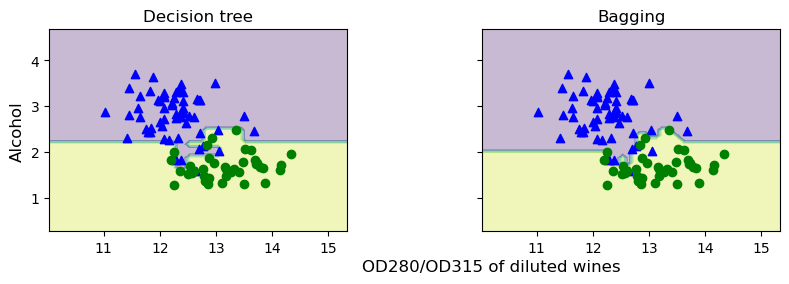

In [ ]:
# Visualización de Fronteras de Decisión

# Este código permite **comparar visualmente** cómo un **árbol de decisión** y un **ensemble Bagging** separan las clases en un conjunto de datos 2D.

import numpy as np
import matplotlib.pyplot as plt

# ================================
# 1️⃣ Definir los límites del gráfico
# ================================
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

# Crear una malla de puntos para evaluar las predicciones
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# ================================
# 2️⃣ Preparar los subplots
# ================================
f, axarr = plt.subplots(nrows=1, ncols=2,
                        sharex='col',
                        sharey='row',
                        figsize=(8, 3))

# ================================
# 3️⃣ Graficar cada clasificador
# ================================
for idx, clf, tt in zip([0, 1],
                        [tree, bag],
                        ['Decision tree', 'Bagging']):
    clf.fit(X_train, y_train)  # Entrenar el modelo

    # Predecir sobre todos los puntos de la malla
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Dibujar las fronteras de decisión
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)

    # Dibujar los puntos de entrenamiento
    axarr[idx].scatter(X_train[y_train == 0, 0],
                       X_train[y_train == 0, 1],
                       c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train == 1, 0],
                       X_train[y_train == 1, 1],
                       c='green', marker='o')

    axarr[idx].set_title(tt)

# ================================
# 4️⃣ Etiquetas y detalles
# ================================
axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -0.5,
         s='OD280/OD315 of diluted wines',
         ha='center', va='center', fontsize=12)

plt.tight_layout()
# plt.savefig('images/07_08.png', dpi=300, bbox_inches='tight')
plt.show()
